<a href="https://colab.research.google.com/github/Marriyam/TEVTA-AI-ML/blob/main/multiple_regression_using_insurance_file.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Multiple Regression using ManualMatrix

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression

# Input data in the form of matrix
X1 = [1, 2, 3, 4]
X2 = [4, 5, 8, 2]
Y = [1, 6, 8, 12]

X = np.column_stack((X1, X2))

# Target variable
Y = np.array(Y)

model = LinearRegression()
model.fit(X, Y)

predictions = model.predict(X)
print(f"Predictions: {predictions}") #correct predicted values


Predictions: [ 1.56557377  4.99453552  8.31420765 12.12568306]


###Multiple Regression using dataset

In [ ]:
import pandas
from sklearn import linear_model
import matplotlib.pyplot as plt

df = pandas.read_csv("/content/data.csv")

X = df[['X1', 'X2']]
y = df['Y']

regr = linear_model.LinearRegression()
regr.fit(X, y)
predicted_values = regr.predict(X)

print(regr.coef_)
print(regr.intercept_)



[ 3.48360656 -0.05464481]
-1.699453551912569


###Plotting Multiple Regression

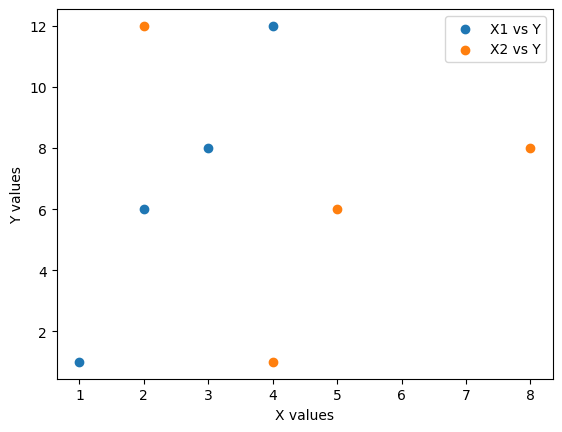

In [ ]:
plt.scatter(df['X1'], df['Y'], label='X1 vs Y')  # Plot X1 against Y
plt.scatter(df['X2'], df['Y'], label='X2 vs Y')  # Plot X2 against Y

plt.xlabel("X values")  # Label the x-axis
plt.ylabel("Y values")  # Label the y-axis
plt.legend()  # Show the legend
plt.show()

##Multiple Regression using Dataset File (insurance.csv)

Just using numeric features that

In [ ]:
import pandas
from sklearn import linear_model
import matplotlib.pyplot as plt

df = pandas.read_csv("/content/insurance.csv")

X = df[['age', 'bmi', 'children']]
y = df['expenses']

regr = linear_model.LinearRegression()
regr.fit(X, y)
predicted_values = regr.predict(X)

predictions = regr.predict(X)
print(f"Predictions: {predictions}")


Predictions: [ 6907.32613573  9172.28450167 12391.97999719 ...  9660.05779036
  6688.95592967 17384.77932889]


In [ ]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y, predictions)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 128932346.53522764


In [ ]:
import pandas
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

df = pandas.read_csv("/content/insurance.csv")

X = df[['age', 'bmi', 'children']]
y = df['expenses']

regr = LinearRegression()
regr.fit(X, y)

# Predictions on the test set
y_pred = regr.predict(X)

# Print predictions
print(f"Test Predictions: {y_pred}")

# Model evaluation
print(f"Coefficients: {regr.coef_}")
print(f"Intercept: {regr.intercept_}")
print(f"Mean Squared Error: {mean_squared_error(y, y_pred)}")
print(f"R2 Score: {r2_score(y, y_pred)}")


Test Predictions: [ 6907.32613573  9172.28450167 12391.97999719 ...  9660.05779036
  6688.95592967 17384.77932889]
Coefficients: [239.96255473 332.52157882 543.04360565]
Intercept: -6929.314453097686
Mean Squared Error: 128932346.53522764
R2 Score: 0.12017256425441947


###Now added Categorical Values as well

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load dataset
df = pd.read_csv("/content/insurance.csv")

# Define features and target
X = df[['age', 'sex', 'bmi', 'children', 'smoker', 'region']]
y = df['expenses']

encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoded_data = encoder.fit_transform(X[['sex', 'smoker', 'region']])
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(['sex', 'smoker', 'region']))

scaler = StandardScaler()
numerical_features = ['age', 'bmi', 'children']
scaled_numerical = scaler.fit_transform(X[numerical_features])
scaled_numerical_df = pd.DataFrame(scaled_numerical, columns=numerical_features, index=X.index)


Final_X = pd.concat([scaled_numerical_df, encoded_df], axis=1)

model=LinearRegression()
model.fit(Final_X, y)

# Make predictions
y_pred = model.predict(Final_X)

# Evaluate the model
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R2 Score: {r2}")

Mean Squared Error: 36499631.63514606
R2 Score: 0.7509284662058436


###Splitting in train/test modules

Improved relevance because R2 is being calculated on a very small data

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load dataset
df = pd.read_csv("/content/insurance.csv")

# Define features and target
X = df[['age', 'sex', 'bmi', 'children', 'smoker', 'region']]
y = df['expenses']

encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoded_data = encoder.fit_transform(X[['sex', 'smoker', 'region']])
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(['sex', 'smoker', 'region']))

scaler = StandardScaler()
numerical_features = ['age', 'bmi', 'children']
scaled_numerical = scaler.fit_transform(X[numerical_features])
scaled_numerical_df = pd.DataFrame(scaled_numerical, columns=numerical_features, index=X.index)


Final_X = pd.concat([scaled_numerical_df, encoded_df], axis=1)

X_train, X_test, y_train, y_test = train_test_split(Final_X, y, test_size=0.2, random_state=42)  # Adjust test_size and random_state as needed

# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)  # Train on the training data

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R2 Score: {r2}")

Mean Squared Error: 33600065.35507783
R2 Score: 0.7835726930039905


###Printing Encoded Data

In [ ]:
print("One-hot encoded columns:")
print(encoded_df)

One-hot encoded columns:
      sex_female  sex_male  smoker_no  smoker_yes  region_northeast  \
0            1.0       0.0        0.0         1.0               0.0   
1            0.0       1.0        1.0         0.0               0.0   
2            0.0       1.0        1.0         0.0               0.0   
3            0.0       1.0        1.0         0.0               0.0   
4            0.0       1.0        1.0         0.0               0.0   
...          ...       ...        ...         ...               ...   
1333         0.0       1.0        1.0         0.0               0.0   
1334         1.0       0.0        1.0         0.0               1.0   
1335         1.0       0.0        1.0         0.0               0.0   
1336         1.0       0.0        1.0         0.0               0.0   
1337         1.0       0.0        0.0         1.0               0.0   

      region_northwest  region_southeast  region_southwest  
0                  0.0               0.0               1.0  


###Predicting using Label Encoder

With split data

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load dataset
df = pd.read_csv("/content/insurance.csv")

# Label encode categorical features
label_encoder = LabelEncoder()
df['sex'] = label_encoder.fit_transform(df['sex'])
df['smoker'] = label_encoder.fit_transform(df['smoker'])
df['region'] = label_encoder.fit_transform(df['region'])

X = df[['age', 'sex', 'bmi', 'children', 'smoker', 'region']]
y = df['expenses']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Evaluating model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R2 Score: {r2}")
print(df[['age', 'sex', 'bmi', 'children', 'smoker']])

Mean Squared Error: 33639075.08997808
R2 Score: 0.7833214205203847
      age  sex   bmi  children  smoker
0      19    0  27.9         0       1
1      18    1  33.8         1       0
2      28    1  33.0         3       0
3      33    1  22.7         0       0
4      32    1  28.9         0       0
...   ...  ...   ...       ...     ...
1333   50    1  31.0         3       0
1334   18    0  31.9         0       0
1335   18    0  36.9         0       0
1336   21    0  25.8         0       0
1337   61    0  29.1         0       1

[1338 rows x 5 columns]


Without Split Data

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load dataset
df = pd.read_csv("/content/insurance.csv")

# Label encode categorical features
label_encoder = LabelEncoder()
df['sex'] = label_encoder.fit_transform(df['sex'])
df['smoker'] = label_encoder.fit_transform(df['smoker'])
df['region'] = label_encoder.fit_transform(df['region'])

X = df[['age', 'sex', 'bmi', 'children', 'smoker', 'region']]
y = df['expenses']

model = LinearRegression()
model.fit(X, y)

y_pred = model.predict(X)

# Evaluating model
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R2 Score: {r2}")
print(df[['age', 'sex', 'bmi', 'children', 'smoker']])

Mean Squared Error: 36525536.8689183
R2 Score: 0.7507516902763371
      age  sex   bmi  children  smoker
0      19    0  27.9         0       1
1      18    1  33.8         1       0
2      28    1  33.0         3       0
3      33    1  22.7         0       0
4      32    1  28.9         0       0
...   ...  ...   ...       ...     ...
1333   50    1  31.0         3       0
1334   18    0  31.9         0       0
1335   18    0  36.9         0       0
1336   21    0  25.8         0       0
1337   61    0  29.1         0       1

[1338 rows x 5 columns]


###Scaling Values

Didn't bring much change

In [ ]:
import pandas
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

df = pandas.read_csv("/content/insurance.csv")

X = df[['age', 'bmi', 'children']]
y = df['expenses']
scaledX = scale.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(scaledX, y, test_size=0.2, random_state=42)

regr = LinearRegression()
regr.fit(X_train, y_train)

# Predictions on the test set
y_pred = regr.predict(X_test)
print(f"Test Predictions: {y_pred}")

# print(f"Coefficients: {regr.coef_}")
# print(f"Intercept: {regr.intercept_}")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred)}")
print(f"R2 Score: {r2_score(y_test, y_pred)}")


Test Predictions: [13310.79097626 11794.15847363 16943.29747396 14261.24139628
  8673.83564095 16207.25649735  5546.95026332 20602.41866055
  5803.7236314  15921.36345381 10297.17358426 14224.18027718
 10679.4131425  19816.45265229 20717.45424803 18309.51336762
 20015.02669105 16981.02430109 13932.79492742 12308.03806382
 10154.01688337 15330.92831553  8174.86457005 11963.92986341
 15942.50166403 16665.38589565 18788.09944056 11630.87795212
 14217.95058625  7854.34371729 14697.81222612 17028.18316885
 10113.2310599   8833.52510962 10150.292179   17040.6425507
  7849.12841596 13869.38029677 13926.56523649 14087.3249439
 10393.09974071  9733.09195753 18701.44614381 15373.95794823
 14188.13354767 16602.65280058 10807.58964742  9160.27565331
 17025.32950072 14611.56346007 19849.45621301  8184.89064202
 17032.64525792  6523.75419489 17672.33971983 16709.69109528
  8972.88542947 13844.37402882 17681.3514022  16644.24768543
 18352.54300031 15954.27951031 21031.67373318 12582.0815844
 15625.16